In [24]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
housing = pd.read_csv('datasets/Admission_Predict.csv')
housing.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
for cols in housing:
    print(cols)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [27]:
housing.shape

(400, 9)

In [28]:
del housing['Serial No.']

In [29]:
housing.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


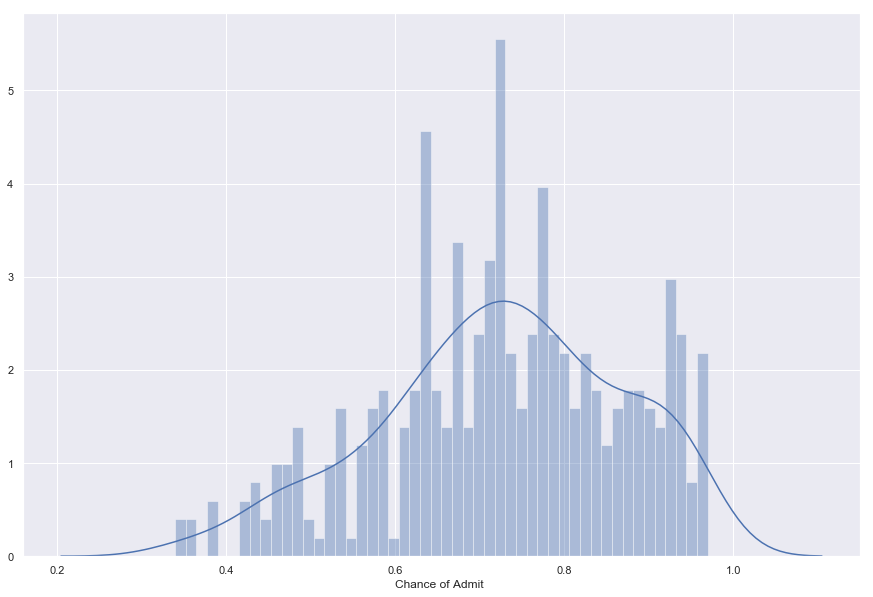

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(housing['Chance of Admit '], bins=50)
plt.show()

In [31]:
### START CODE HERE ### 
housing_normalized = housing
for cols in housing:
    print('column : ',cols)
    Max = housing[cols].max()
    print('max : ',Max)
    Min = housing[cols].min()
    print('min : ',Min)
    Avg = housing[cols].mean()
    print('average : ',Avg)
    for i in range(len(housing)):
        normalize = (housing[cols][i] - Avg)/(Max - Min)
        housing_normalized[cols][i] = normalize
    print('-----------------------------------')
### END CODE HERE ###

column :  GRE Score
max :  340
min :  290
average :  316.8075


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


-----------------------------------
column :  TOEFL Score
max :  120
min :  92
average :  107.41
-----------------------------------
column :  University Rating
max :  5
min :  1
average :  3.0875
-----------------------------------
column :  SOP
max :  5.0
min :  1.0
average :  3.4
-----------------------------------
column :  LOR 
max :  5.0
min :  1.0
average :  3.4525
-----------------------------------
column :  CGPA
max :  9.92
min :  6.8
average :  8.598924999999998
-----------------------------------
column :  Research
max :  1
min :  0
average :  0.5475
-----------------------------------
column :  Chance of Admit 
max :  0.97
min :  0.34
average :  0.7243499999999996
-----------------------------------


In [32]:
housing_normalized.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,0,0,0.275,0.261875,0.336883,0,0.310556
1,0,0,0,0.150,0.261875,0.086883,0,0.056587
2,0,0,0,-0.100,0.011875,-0.191963,0,-0.006905
3,0,0,0,0.025,-0.238125,0.022780,0,0.120079
4,0,0,0,-0.350,-0.113125,-0.124655,0,-0.118016


In [33]:
threshold = 350
X = housing_normalized.iloc[:,0:7]
Y = housing_normalized.iloc[:,7:]
# train_set
train_set_x = X[:threshold]
train_set_y = Y[:threshold]
# test_set
test_set_x = X[threshold:]
test_set_y = Y[threshold:]
############################
train_set_x = train_set_x.T.values
test_set_x = test_set_x.T.values
train_set_y = train_set_y.values
test_set_y = test_set_y.values
#############################
print("dim of train_set_x" + str(train_set_x.shape))
print("dim of test_set_x" + str(test_set_x.shape))
print("dim of train_set_y" + str(train_set_y.shape))
print("dim of test_set_y" + str(test_set_y.shape))

dim of train_set_x(7, 350)
dim of test_set_x(7, 50)
dim of train_set_y(350, 1)
dim of test_set_y(50, 1)


In [34]:
train_set_x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.261875  ,  0.261875  ,  0.011875  , ..., -0.613125  ,
        -0.363125  , -0.113125  ],
       [ 0.33688301,  0.08688301, -0.19196314, ..., -0.4035016 ,
        -0.43234776, -0.17914263],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
train_set_y

array([[ 0.31055556],
       [ 0.0565873 ],
       [-0.00690476],
       [ 0.12007937],
       [-0.11801587],
       [ 0.27880952],
       [ 0.04071429],
       [-0.07039683],
       [-0.35611111],
       [-0.43547619],
       [-0.32436508],
       [ 0.18357143],
       [ 0.08833333],
       [-0.16563492],
       [-0.18150794],
       [-0.29261905],
       [-0.10214286],
       [-0.11801587],
       [-0.1497619 ],
       [-0.16563492],
       [-0.13388889],
       [-0.03865079],
       [ 0.34230159],
       [ 0.3581746 ],
       [ 0.38992063],
       [ 0.34230159],
       [ 0.0565873 ],
       [-0.45134921],
       [-0.41960317],
       [-0.29261905],
       [-0.11801587],
       [ 0.02484127],
       [ 0.29468254],
       [ 0.27880952],
       [ 0.34230159],
       [ 0.24706349],
       [-0.13388889],
       [-0.22912698],
       [-0.32436508],
       [-0.38785714],
       [-0.41960317],
       [-0.37198413],
       [-0.30849206],
       [ 0.23119048],
       [ 0.29468254],
       [ 0

In [36]:
def initialize_with_zeros(dim):
    """
    This function creates a matrix of zeros of data shape for w and initializes b to 0.
    
    Argument:
    dim -- size of the w matrix we want 
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    ### START CODE HERE 
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###
    
    return w, b

In [37]:
def compute_cost_and_gradient(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data
    Y -- house prices

    Return:
    cost -- cost function for linear regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    n = Y.shape[0]
    ### START CODE HERE 
    h = (np.matmul(w.transpose(),X))+ b
    cost = (-1/m)*np.matmul((Y - h.transpose()),(Y - h.transpose()).transpose())

    ### END CODE HERE ###
    
    ### START CODE HERE ### 
    dw = (-2/m)*(np.matmul(X,(Y - h.transpose())))
    db = (-2/m)*(np.matmul(np.ones((1,n)),Y-h.transpose()))
    ### END CODE HERE ###
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [38]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- home price
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use compute_cost_and_gradient().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        ### START CODE HERE ### 
        grads, cost = compute_cost_and_gradient(w, b, X, Y)
        ### END CODE HERE ###
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update weight
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [39]:
def predict(w, b, X):
    
    ### START CODE HERE ###
    Y_prediction = (np.matmul(w.transpose(), X) + b)
    ### END CODE HERE ###
    return Y_prediction.T

In [40]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the  regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zerodds
    dim = X_train.shape[0]
    w, b = initialize_with_zeros(dim)
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    print("Y_train " + str(Y_train.shape))
    print("Y_prediction_train " + str(Y_prediction_train.shape))
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d    

In [41]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

Y_train (350, 1)
Y_prediction_train (350, 1)
train accuracy: 92.27503286561416 %
test accuracy: 91.47705086764267 %


In [42]:
d['w']

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.02524058],
       [0.15722352],
       [0.87853869],
       [0.        ]])

In [43]:
d['b']

array([[-0.00252642]])

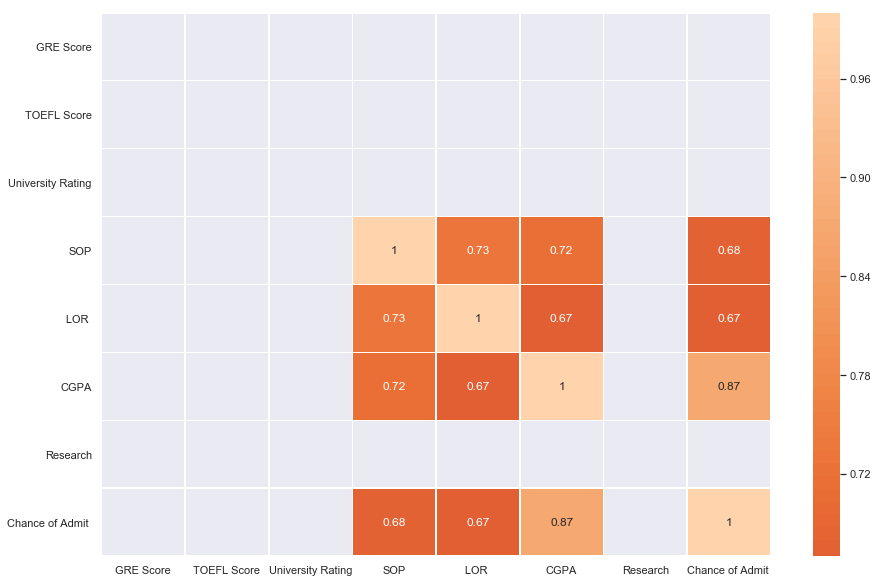

In [44]:
correlation_matrix = housing.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

In [45]:
X = pd.DataFrame(np.c_[housing['SOP'],housing['CGPA']], columns = ['SOP','CGPA'])
Y = housing['Chance of Admit ']

In [46]:
X.head(5)

,SOP,CGPA
0,0.275,0.336883
1,0.150,0.086883
2,-0.100,-0.191963
3,0.025,0.022780
4,-0.350,-0.124655


In [47]:
Y.head(5)

0    0.310556
1    0.056587
2   -0.006905
3    0.120079
4   -0.118016
Name: Chance of Admit , dtype: float64

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [49]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
print(lin_model.intercept_,lin_model.coef_)

-0.0042620232150852 [0.06961003 0.99624973]


In [50]:
accuracy = lin_model.score(X_test,Y_test)
print(accuracy*100,'%')

70.76529809176695 %


In [51]:
accuracy = lin_model.score(X_train,Y_train)
print(accuracy*100,'%')

77.54853486490056 %
